In [1]:

import pandas as pd
a=pd.read_table("/home/jash/Desktop/petplan/Profitability1.txt", sep='|', lineterminator='\n', error_bad_lines=False)

Skipping line 267909: expected 33 fields, saw 34

Skipping line 299539: expected 33 fields, saw 34

/home/jash/anaconda3/envs/py27/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,17,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
data=pd.DataFrame(data=a,index=None)
data = data.sample(frac=1).reset_index(drop=True)
import math
import numpy as np
data['LossRatio'].fillna(0, inplace=True)
data['L']=0
data.loc[data['LossRatio'] >.57, 'L'] = 1
data.to_csv("/home/jash/Desktop/petplan/Profitabilitynew.csv")
Y=data['L']
y=pd.DataFrame(Y)
x=pd.DataFrame(data)

m=x.loc[x['PolicyForm']!='Introductory']
q=pd.DataFrame(m)
m2=q.loc[q['PolicyForm']!='Intro']
x=pd.DataFrame(m2)
print x.head()




   LossRatio  Duration              PetId   StartDate     EndDate  \
2   0.000000       834  US103287Francesca  2016-04-15  2018-10-03   
3   0.000000      1135      US1331402Beau  2015-06-19  2019-07-10   
4   0.016332      1018       US54167Riley  2015-10-14  2018-10-13   
5   0.000000       402      CAN144904Anna  2017-06-21  2019-06-20   
7   0.000000       180    US1555475Lardon  2016-01-14  2016-07-11   

  LastPolicyRef  TotalClaimsAmtPaid  TotalEarnedPremium  \
2        507051                0.00          432.444493   
3        668970                 NaN          720.700027   
4        511800               13.52          827.838849   
5        154278                 NaN          261.916493   
7        188401                0.00          182.513115   

                     BreedName  Currentage ...  Surname  GivenName  \
2           Domestic Shorthair         2.0 ...    Moyer      Leann   
3                 Labrador Mix         3.0 ...   Hinton   Michelle   
4                 La

In [3]:
x.drop(['LossRatio'],axis=1,inplace=True)
x.drop(['CustomerNumber','PhoneNumber','Surname','GivenName','CustomerMailingAddr_Addr1','CustomerMailingAddr_City','CustomerMailingAddr_StateProvCd',
       'CustomerMailingAddr_PostalCode','PetId','StartDate','EndDate','LastPolicyRef'],axis=1,inplace=True)

p=pd.DataFrame(x)

p['TotalClaimsAmtPaid'].fillna(0, inplace=True)

In [4]:
p.isnull().sum()

Duration                       0
TotalClaimsAmtPaid             0
TotalEarnedPremium             0
BreedName                     24
Currentage                     0
CopayPct                       0
Deductible                     0
PetType                        0
PolicyForm                     0
CarrierCd                      0
ClaimNumber               149283
ClaimAmount               149283
ClaimDetails              149283
ConditionGrp              149283
Claimcodecategory         149283
Severity                  149581
Country                      336
Quadrant                       0
claimdurationInception    149283
churn\r                        0
L                              0
dtype: int64

In [5]:
p.drop(['ClaimNumber','ClaimAmount','Severity','ClaimDetails','ConditionGrp','Claimcodecategory','claimdurationInception'],axis=1,inplace=True)

In [6]:

p.isnull().sum()

Duration                0
TotalClaimsAmtPaid      0
TotalEarnedPremium      0
BreedName              24
Currentage              0
CopayPct                0
Deductible              0
PetType                 0
PolicyForm              0
CarrierCd               0
Country               336
Quadrant                0
churn\r                 0
L                       0
dtype: int64

In [7]:

p.dropna(how='any',inplace=True)
p.drop(['Quadrant','TotalClaimsAmtPaid','TotalEarnedPremium'],axis=1,inplace=True)


In [8]:
p.isnull().sum()

Duration      0
BreedName     0
Currentage    0
CopayPct      0
Deductible    0
PetType       0
PolicyForm    0
CarrierCd     0
Country       0
churn\r       0
L             0
dtype: int64

In [9]:
print p.shape

(276915, 11)


In [10]:


import h2o
from h2o.estimators import H2ORandomForestEstimator
h2o.init()
df = h2o.H2OFrame(p)
y = 'L'
x=df.col_names
x.remove(y)
df[y] = df[y].asfactor()
train, valid, test = df.split_frame(ratios=[.8,.1])
print len(train)
from h2o.estimators.gbm import H2OGradientBoostingEstimator
gbm_cv3 = H2OGradientBoostingEstimator(nfolds=3)
gbm_cv3.train(x=x, y=y, training_frame=train)
## Getting all cross validated models 
all_models = gbm_cv3.cross_validation_models()
print("Total cross validation models: " + str(len(all_models)))

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_121"; OpenJDK Runtime Environment (Zulu 8.20.0.5-linux64) (build 1.8.0_121-b15); OpenJDK 64-Bit Server VM (Zulu 8.20.0.5-linux64) (build 25.121-b15, mixed mode)
  Starting server from /home/jash/anaconda3/envs/py27/h2o_jar/h2o.jar
  Ice root: /tmp/tmpw9J_UC
  JVM stdout: /tmp/tmpw9J_UC/h2o_jash_started_from_python.out
  JVM stderr: /tmp/tmpw9J_UC/h2o_jash_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,Asia/Kolkata
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.2
H2O cluster version age:,4 months and 28 days !!!
H2O cluster name:,H2O_from_python_jash_3vkz5p
H2O cluster total nodes:,1
H2O cluster free memory:,1.714 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


/home/jash/anaconda3/envs/py27/lib/python2.7/site-packages/h2o/h2o.py:562: UserWarning: [Lwater.parser.ParseWriter$ParseErr;@6caca43f
  warnings.warn(w)


Parse progress: |█████████████████████████████████████████████████████████| 100%


/home/jash/anaconda3/envs/py27/lib/python2.7/site-packages/h2o/job.py:69: UserWarning: ParseError at file upload_9c5ea93d39f1fadc81cdba8c4ff244d7 at line 0 ( destination line 0 )  at byte offset 111; error = 'Unmatched quote char "'
  warnings.warn(w)
/home/jash/anaconda3/envs/py27/lib/python2.7/site-packages/h2o/job.py:69: UserWarning: ParseError at file upload_9c5ea93d39f1fadc81cdba8c4ff244d7 at line 2 ( destination line 2 )  at byte offset 117; error = 'Unmatched quote char "'
  warnings.warn(w)


221781
gbm Model Build progress: |███████████████████████████████████████████████| 100%
Total cross validation models: 3


In [11]:
gbm_cv3.confusion_matrix()
performance = gbm_cv3.model_performance(test_data=test)
print performance


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.163461380309
RMSE: 0.404303574445
LogLoss: 0.487463821361
Mean Per-Class Error: 0.260297997151
AUC: 0.821604822504
Gini: 0.643209645007
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.382306677751: 


,0,1,Error,Rate
0,12440.0,5387.0,0.3022,(5387.0/17827.0)
1,2173.0,7776.0,0.2184,(2173.0/9949.0)
Total,14613.0,13163.0,0.2722,(7560.0/27776.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3823067,0.6728972,215.0
max f2,0.1585493,0.7982356,318.0
max f0point5,0.5375593,0.6552197,139.0
max accuracy,0.4977336,0.7489559,160.0
max precision,0.9426947,1.0,0.0
max recall,0.0177379,1.0,395.0
max specificity,0.9426947,1.0,0.0
max absolute_mcc,0.4005417,0.4619146,207.0
max min_per_class_accuracy,0.4124037,0.7362428,201.0
max mean_per_class_accuracy,0.3823067,0.7397020,215.0


Gains/Lift Table: Avg response rate: 35.82 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100086,0.8602170,2.7315829,2.7315829,0.9784173,0.9784173,0.0273394,0.0273394,173.1582871,173.1582871
,2,0.0202333,0.8230860,2.6542125,2.6924847,0.9507042,0.9644128,0.0271384,0.0544778,165.4212540,169.2484697
,3,0.0301339,0.7999697,2.5177306,2.6350685,0.9018182,0.9438471,0.0249271,0.0794050,151.7730608,163.5068479
,4,0.0400346,0.7786656,2.4060571,2.5784335,0.8618182,0.9235612,0.0238215,0.1032265,140.6057073,157.8433464
,5,0.0500072,0.7611773,2.3382906,2.5305432,0.8375451,0.9064075,0.0233189,0.1265454,133.8290625,153.0543207
,6,0.1000144,0.6902925,2.1787997,2.3546715,0.7804176,0.8434125,0.1089557,0.2355011,117.8799712,135.4671459
,7,0.1500936,0.6327837,1.8846414,2.1978445,0.6750539,0.7872391,0.0943813,0.3298824,88.4641434,119.7844459
,8,0.2000288,0.5889117,1.7632663,2.0893564,0.6315789,0.7483801,0.0880491,0.4179315,76.3266343,108.9356365
,9,0.3000072,0.5035194,1.4989669,1.8926071,0.5369103,0.6779071,0.1498643,0.5677958,49.8966877,89.2607102
,10,0.4000216,0.4362098,1.2883862,1.7415383,0.4614831,0.6237962,0.1288572,0.6966529,28.8386176,74.1538276


In [12]:
import matplotlib.pyplot as plt
gbm_cv3.varimp_plot()

<Figure size 1400x1000 with 1 Axes>

In [13]:
import subprocess
from IPython.display import Image

In [14]:
mojo_file_name = "/home/jash/Desktop/petplan/trees/my_gbm_mojo.zip"
h2o_jar_path= '/home/jash/Desktop/petplan/trees/h2o-3.20.0.4/h2o.jar'
mojo_full_path = mojo_file_name
gv_file_path = "/home/jash/Desktop/petplan/trees/my_gbm_graph.gv"

In [15]:
image_file_name = "/home/jash/Desktop/petplan/trees/my_gbm_tree"

In [16]:
gbm_cv3.download_mojo(mojo_file_name)

'/home/jash/Desktop/petplan/trees/my_gbm_mojo.zip'

In [17]:

def generateTree(h2o_jar_path, mojo_full_path, gv_file_path, image_file_path, tree_id = 0):
    image_file_path = image_file_path + "_" + str(tree_id) + ".png"
    result = subprocess.call(["java", "-cp", h2o_jar_path, "hex.genmodel.tools.PrintMojo", "--tree", str(tree_id), "-i", mojo_full_path , "-o", gv_file_path ], shell=False)
    result = subprocess.call(["ls",gv_file_path], shell = False)
    if result is 0:
        print("Success: Graphviz file " + gv_file_path + " is generated.")
    else: 
        print("Error: Graphviz file " + gv_file_path + " could not be generated.")

In [18]:
def generateTreeImage(gv_file_path, image_file_path, tree_id):
    image_file_path = image_file_path + "_" + str(tree_id) + ".png"
    result = subprocess.call(["dot", "-Tpng", gv_file_path, "-o", image_file_path], shell=False)
    result = subprocess.call(["ls",image_file_path], shell = False)
    if result is 0:
        print("Success: Image File " + image_file_path + " is generated.")
        print("Now you can execute the follow line as-it-is to see the tree graph:") 
        print("Image(filename='" + image_file_path + "\')")
    else:
        print("Error: Image file " + image_file_path + " could not be generated.")

In [19]:

generateTree(h2o_jar_path, mojo_full_path, gv_file_path, image_file_name, 3)

Success: Graphviz file /home/jash/Desktop/petplan/trees/my_gbm_graph.gv is generated.


In [20]:
generateTreeImage(gv_file_path, image_file_name, 3)


Success: Image File /home/jash/Desktop/petplan/trees/my_gbm_tree_3.png is generated.
Now you can execute the follow line as-it-is to see the tree graph:
Image(filename='/home/jash/Desktop/petplan/trees/my_gbm_tree_3.png')


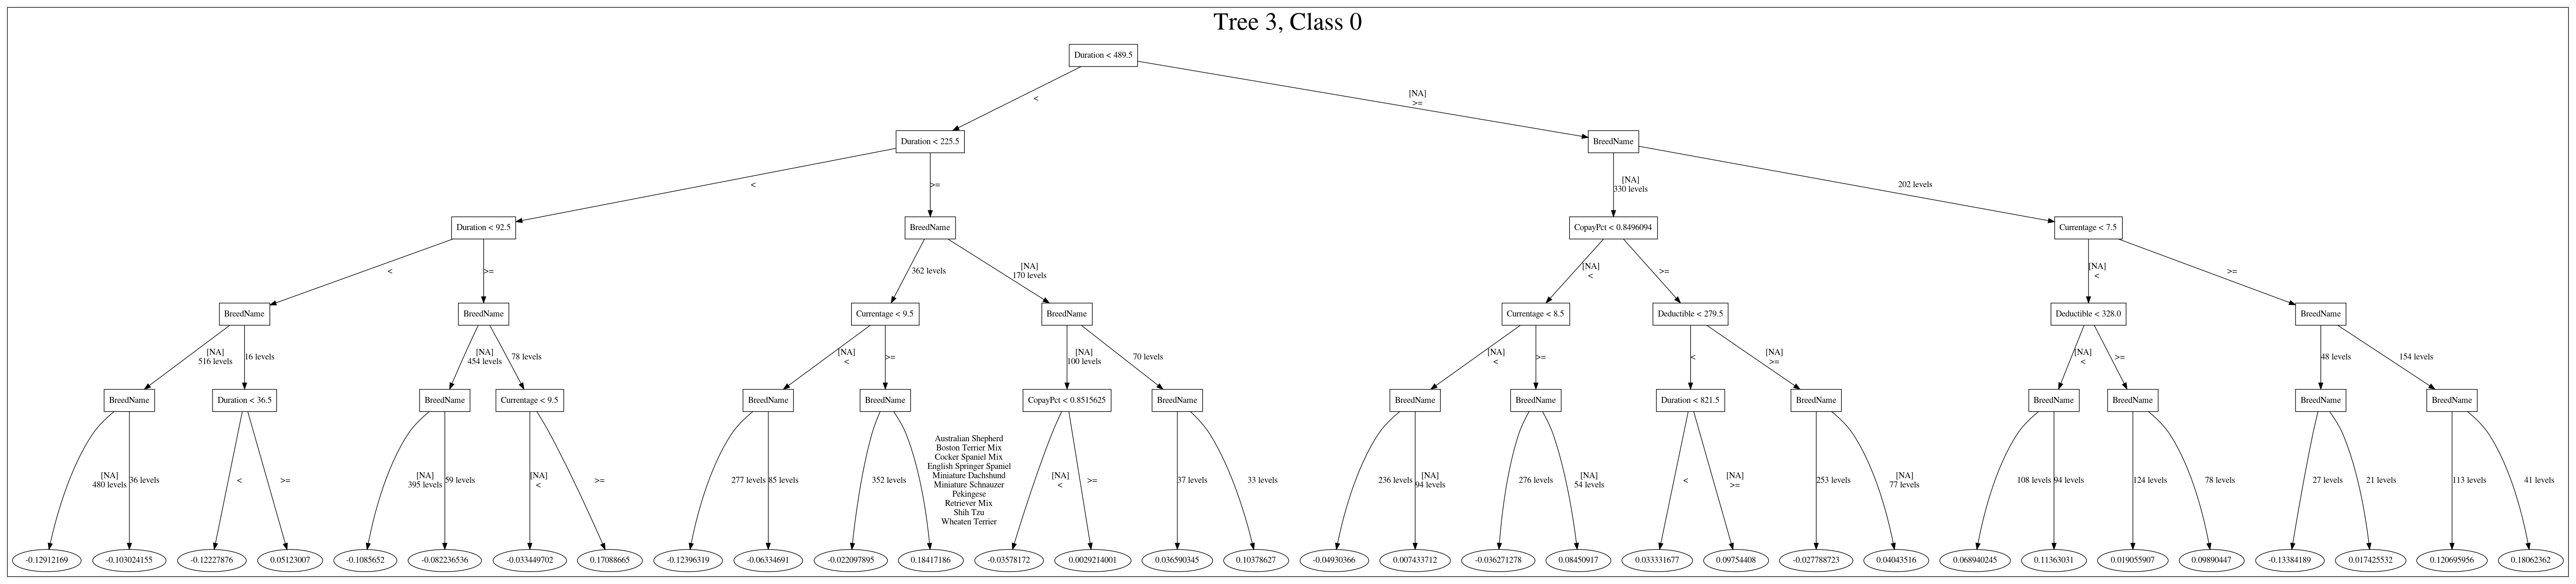

In [21]:
Image(filename='/home/jash/Desktop/petplan/trees/my_gbm_tree_3.png')